A hat contains 2024 pieces of paper numbered 1 through 2024. I draw two pieces of paper at random from the hat. The smaller of the two numbers drawn is subtracted from the larger. That difference is written on a new piece of paper which is placed in the hat, and the two original pieces are discarded. I repeat this process until one piece of paper remains. 

Draw two random numbers $x_1,x_2$, from Set = {1,...,2024}

Calculate $y = max(x_1,x_2) - min(x_1,x_2)$,

$Set = (Set - \{x_1,x_2\})\cup \{y\}$
    
repeat until 1 number left, then return that number


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import random
import seaborn as sns
import statistics

In [4]:
Set = np.asarray([i for i in range(1,2025)])
choices = np.random.choice(Set, 2, replace=False)
m1 = choices[0]
m2 = choices[1]
MAX = max([Set[m1],Set[m2]])
MIN = min([Set[m1],Set[m2]])
y = MAX - MIN

In [6]:
MAX, MIN

(1805, 485)

In [5]:
y

1320

In [58]:
def runHatGame():
    Set = np.asarray([i for i in range(1,2025)])
    i = 0
    while((len(Set) > 1)):
        i += 1
        if(len(Set) > 1):
            choices = np.random.choice(Set, 2, replace=False)
            m1 = choices[0]
            m2 = choices[1]
            MAX = max(m1,m2)
            MIN = min(m1,m2)
            y = MAX - MIN
            Set = np.delete(Set, np.where(Set == MAX)[0][0],0)
            Set = np.delete(Set, np.where(Set == MIN)[0][0],0)
            Set = np.append(Set, y)
    if(len(Set) > 1):
        return -len(Set)
    else:
        return Set[0]
        

In [56]:
def runHatGameOnce():
    Set = np.asarray([i for i in range(1,2025)])
    i = 0
    while((len(Set) > 1)):
        i += 1
        if(len(Set) > 1):
            choices = np.random.choice(Set, 2, replace=False)
            m1 = choices[0]
            m2 = choices[1]
            MAX = max(m1,m2)
            MIN = min(m1,m2)
            y = MAX - MIN
            print(MAX, MIN, y, len(Set), np.where(Set == MIN)[0],np.where(Set == MAX)[0])
            Set = np.delete(Set, np.where(Set == MAX)[0][0],0)
            Set = np.delete(Set, np.where(Set == MIN)[0][0],0)
            Set = np.append(Set, y)
            print(len(Set))
            
    if(len(Set) > 1):
        return -len(Set)
    else:
        return Set[0]
        

In [57]:
runHatGameOnce()

609 607 2 2024 [606] [608]
2023
1964 758 1206 2023 [755] [1961]
2022
606 513 93 2022 [512] [605]
2021
1103 421 682 2021 [420] [1097]
2020
1457 918 539 2020 [911] [1449]
2019
1614 519 1095 2019 [516] [1604]
2018
1041 265 776 2018 [264] [1032]
2017
462 83 379 2017 [82] [459]
2016
765 175 590 2016 [173] [754]
2015
1550 1334 216 2015 [1318] [1533]
2014
162 94 68 2014 [92] [160]
2013
1948 879 1069 2013 [864] [1926]
2012
1395 858 537 2012 [843] [1375]
2011
735 21 714 2011 [20] [722]
2010
1112 910 202 2010 [891] [1090]
2009
387 188 199 2009 [182] [380]
2008
1954 1774 180 2008 [1743] [1922]
2007
1815 493 1322 2007 [482] [1783]
2006
1932 683 1249 2006 [666] [1898]
2005
1924 1801 123 2005 [1767] [1889]
2004
932 448 484 2004 [438] [907]
2003
1996 379 1617 2003 [ 371 1989] [1953]
2002
907 860 47 2002 [836] [882]
2001
1873 834 1039 2001 [811] [1832]
2000
1601 384 1217 2000 [375] [1563]
1999
1439 305 1134 1999 [297] [1402]
1998
1913 1083 830 1998 [1049] [1866]
1997
1570 1380 190 1997 [1342] [1528]
1

104

In [55]:
np.where(Set == MAX)[0][0]

1804

In [59]:
final = []
its = 1000
for i in range(its):
    final.append(runHatGame())

In [60]:
cs = []
for j in range(1,2025):
       cs.append(final.count(j)) 

In [61]:
std = statistics.stdev(cs)

/Users/admin/anaconda3/envs/obb/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: >

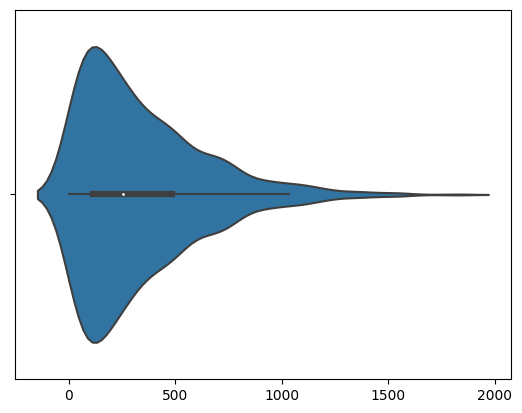

In [62]:
sns.violinplot(final)

In [63]:
import pandas as pd

In [64]:
from scipy.stats import lognorm
import statistics

In [65]:
p = []
mu = np.mean(final)
for i in range(1,2025):
    p.append(lognorm.pdf(i,mu, std))

<Axes: ylabel='Density'>

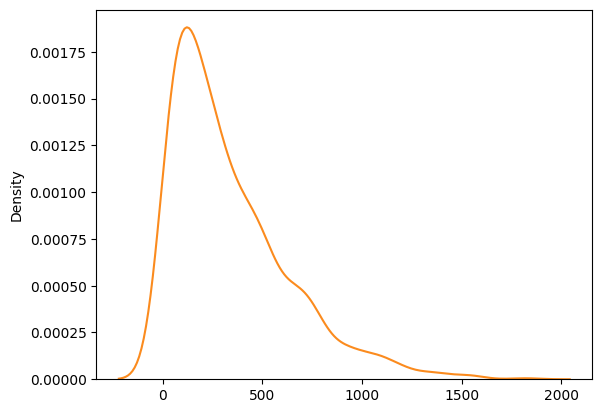

In [66]:
plt.figure()
sns.kdeplot(final, color = '#fb8b1e')

In [67]:
evenCount = 0
oddCount = 0
for i in range(len(final)):
    if(final[i]%2 == 0):
        evenCount += 1
    else:
        oddCount += 1

<BarContainer object of 2 artists>

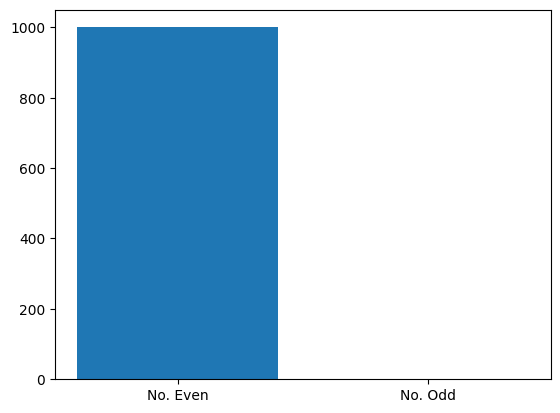

In [68]:
plt.bar(['No. Even', 'No. Odd'], [evenCount, oddCount])

<h1> Extension: subtraction with modulo arithmetic </h1>

In [70]:
def runHatGameMod(mod):
    Set = np.asarray([i for i in range(1,2025)])
    i = 0
    while((len(Set) > 1)):
        i += 1
        if(len(Set) > 1):
            choices = np.random.choice(Set, 2, replace=False)
            m1 = choices[0]
            m2 = choices[1]
            MAX = max(m1,m2)
            MIN = min(m1,m2)
            y = (MAX - MIN) % mod
            Set = np.delete(Set, np.where(Set == MAX)[0][0],0)
            Set = np.delete(Set, np.where(Set == MIN)[0][0],0)
            Set = np.append(Set, y)
    if(len(Set) > 1):
        return -len(Set)
    else:
        return Set[0]
        

*---- (20% Complete)
**--- (40% Complete)
***-- (60% Complete)
****- (80% Complete)


Text(0.5, 1.0, 'Frequency of Modular Equivalence Classes for $X_1 - X_2$ mod 20')

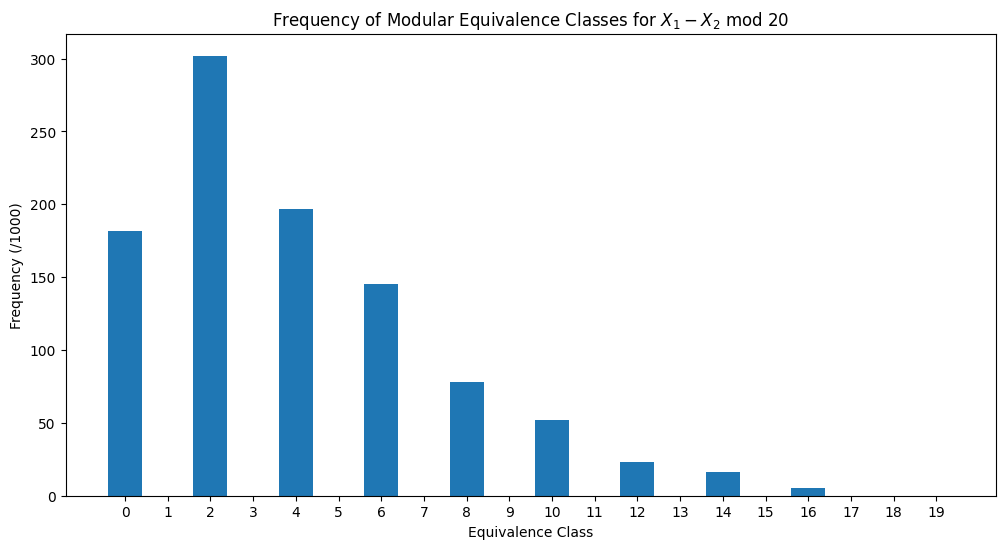

In [86]:
mod = 20
final = []
its = 1000
for i in range(its):
    final.append(runHatGameMod(mod))
    if(i == its//5):
        print("*---- (20% Complete)")
    elif(i == 2*its//5):
        print("**--- (40% Complete)")
    elif(i == 3*its//5):
        print("***-- (60% Complete)")
    elif(i == 4*its//5):
        print("****- (80% Complete)")
    
counts = [0 for i in range(mod)]
for i in range(len(final)):
    counts[final[i]] += 1
        
barnames = [f'{i}' for i in range(mod)]
plt.figure(figsize = (12,6))
plt.bar(barnames, counts)
plt.xlabel('Equivalence Class')
plt.ylabel(f'Frequency (/{its})')
plt.title(f'Frequency of Modular Equivalence Classes for $X_1 - X_2$ mod {mod}')

*---- (20% Complete)
**--- (40% Complete)
***-- (60% Complete)
****- (80% Complete)


Text(0.5, 1.0, 'Frequency of Modular Equivalence Classes for $X_1 - X_2$ mod 20')

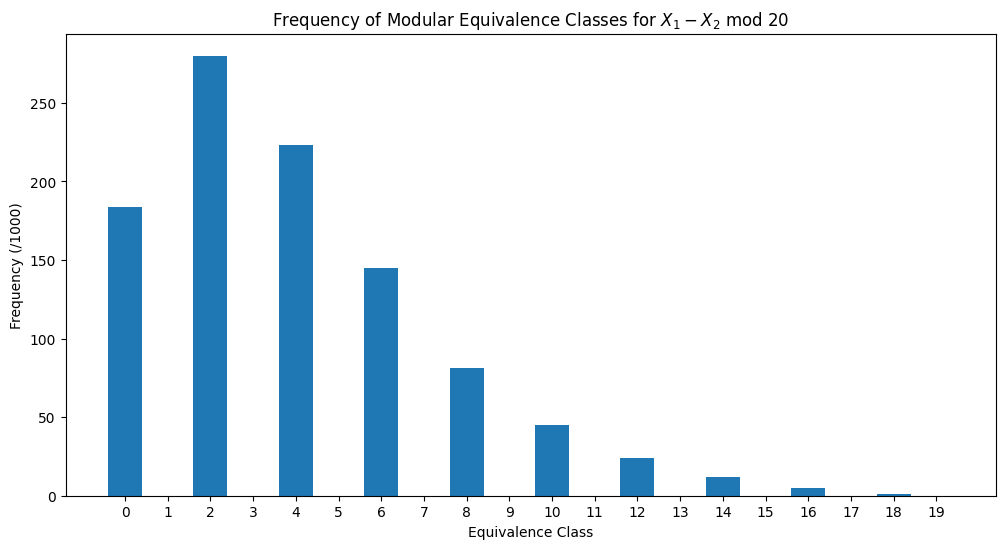

In [100]:
mod = 20
final = []
its = 1000
for i in range(its):
    final.append(runHatGameMod(mod))
    if(i == its//5):
        print("*---- (20% Complete)")
    elif(i == 2*its//5):
        print("**--- (40% Complete)")
    elif(i == 3*its//5):
        print("***-- (60% Complete)")
    elif(i == 4*its//5):
        print("****- (80% Complete)")
    
counts = [0 for i in range(mod)]
for i in range(len(final)):
    counts[final[i]] += 1
        
barnames = [f'{i}' for i in range(mod)]
plt.figure(figsize = (12,6))
plt.bar(barnames, counts)
plt.xlabel('Equivalence Class')
plt.ylabel(f'Frequency (/{its})')
plt.title(f'Frequency of Modular Equivalence Classes for $X_1 - X_2$ mod {mod}')

*---- (20% Complete)
**--- (40% Complete)
***-- (60% Complete)
****- (80% Complete)
*---- (20% Complete)
**--- (40% Complete)
***-- (60% Complete)
****- (80% Complete)
*---- (20% Complete)
**--- (40% Complete)
***-- (60% Complete)
****- (80% Complete)
*---- (20% Complete)
**--- (40% Complete)
***-- (60% Complete)
****- (80% Complete)
*---- (20% Complete)
**--- (40% Complete)
***-- (60% Complete)
****- (80% Complete)


Text(0.5, 1.0, 'Frequency of Modular Equivalence Classes for $X_1 - X_2$ mod [2, 3, 4, 7, 15]')

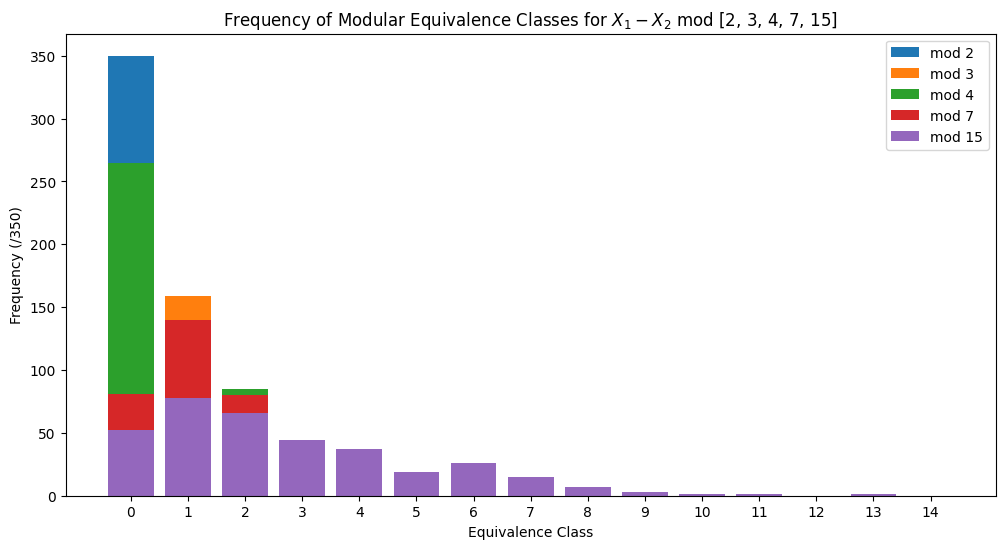

In [101]:
mods = [2,3,4,7,15]
final1 = []
final2 = []
final3 = []
final4 = []
final5 = []
its = 350
for i in range(its):
    final1.append(runHatGameMod(mods[0]))
    if(i == its//5):
        print("*---- (20% Complete)")
    elif(i == 2*its//5):
        print("**--- (40% Complete)")
    elif(i == 3*its//5):
        print("***-- (60% Complete)")
    elif(i == 4*its//5):
        print("****- (80% Complete)")
for i in range(its):
    final2.append(runHatGameMod(mods[1]))
    if(i == its//5):
        print("*---- (20% Complete)")
    elif(i == 2*its//5):
        print("**--- (40% Complete)")
    elif(i == 3*its//5):
        print("***-- (60% Complete)")
    elif(i == 4*its//5):
        print("****- (80% Complete)")
for i in range(its):
    final3.append(runHatGameMod(mods[2]))
    if(i == its//5):
        print("*---- (20% Complete)")
    elif(i == 2*its//5):
        print("**--- (40% Complete)")
    elif(i == 3*its//5):
        print("***-- (60% Complete)")
    elif(i == 4*its//5):
        print("****- (80% Complete)")
for i in range(its):
    final4.append(runHatGameMod(mods[3]))
    if(i == its//5):
        print("*---- (20% Complete)")
    elif(i == 2*its//5):
        print("**--- (40% Complete)")
    elif(i == 3*its//5):
        print("***-- (60% Complete)")
    elif(i == 4*its//5):
        print("****- (80% Complete)")
for i in range(its):
    final5.append(runHatGameMod(mods[4]))
    if(i == its//5):
        print("*---- (20% Complete)")
    elif(i == 2*its//5):
        print("**--- (40% Complete)")
    elif(i == 3*its//5):
        print("***-- (60% Complete)")
    elif(i == 4*its//5):
        print("****- (80% Complete)")
    
counts1 = [0 for i in range(mods[len(mods) - 1])]
counts2 = [0 for i in range(mods[len(mods) - 1])]
counts3 = [0 for i in range(mods[len(mods) - 1])]
counts4 = [0 for i in range(mods[len(mods) - 1])]
counts5 = [0 for i in range(mods[len(mods) - 1])]
for i in range(len(final1)):
    counts1[final1[i]] += 1
    counts2[final2[i]] += 1
    counts3[final3[i]] += 1
    counts4[final4[i]] += 1
    counts5[final5[i]] += 1
        
barnames = [f'{i}' for i in range(mods[len(mods) - 1])]
plt.figure(figsize = (12,6))
plt.bar(barnames, counts1, label = f'mod {mods[0]}')
plt.bar(barnames, counts2, label = f'mod {mods[1]}')
plt.bar(barnames, counts3, label = f'mod {mods[2]}')
plt.bar(barnames, counts4, label = f'mod {mods[3]}')
plt.bar(barnames, counts5, label = f'mod {mods[4]}')
plt.legend()
plt.xlabel('Equivalence Class')
plt.ylabel(f'Frequency (/{its})')
plt.title(f'Frequency of Modular Equivalence Classes for $X_1 - X_2$ mod {mods}')